<a href="https://colab.research.google.com/github/RachanaKC/Data-Science-Project/blob/main/Rachana_Clustering_of_Insurance_dataset_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from matplotlib.pyplot import xticks
# from matplotlib.pyplot import yticks

In [2]:
df = pd.DataFrame(pd.read_csv("insurance.csv"))
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
row,col = df.shape
print("No of rows = ",row)
print("No of cols = ",col)

No of rows =  1338
No of cols =  7


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [7]:
print(len(set(df['region'])))
print(len(set(df['sex'])))
print(len(set(df['smoker'])))

4
2
2


In [8]:
auto=df[['age', 'sex', 'region', 'smoker','bmi','expenses']]

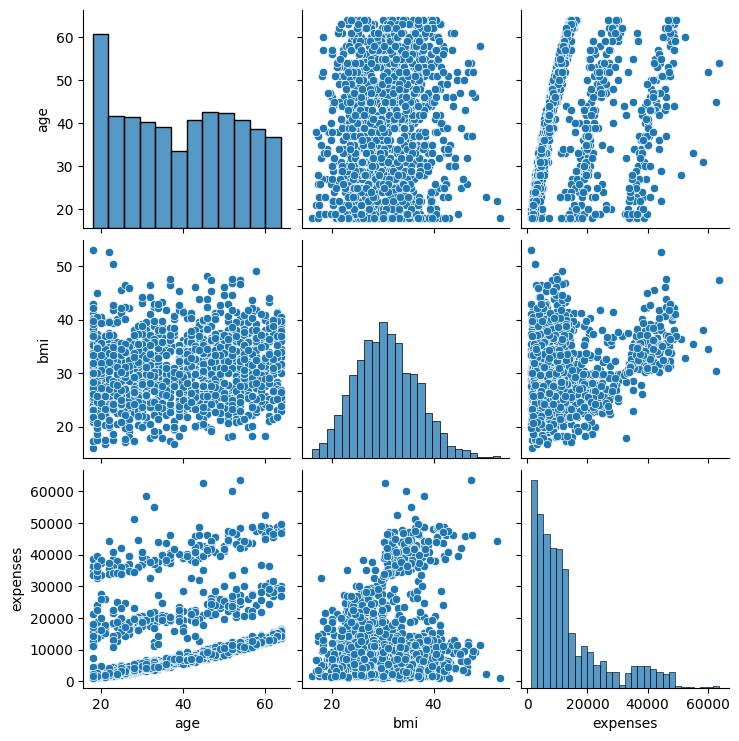

In [9]:
sns.pairplot(auto)

In [10]:
auto1=df[['age', 'bmi','expenses']]
auto1.corr()

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


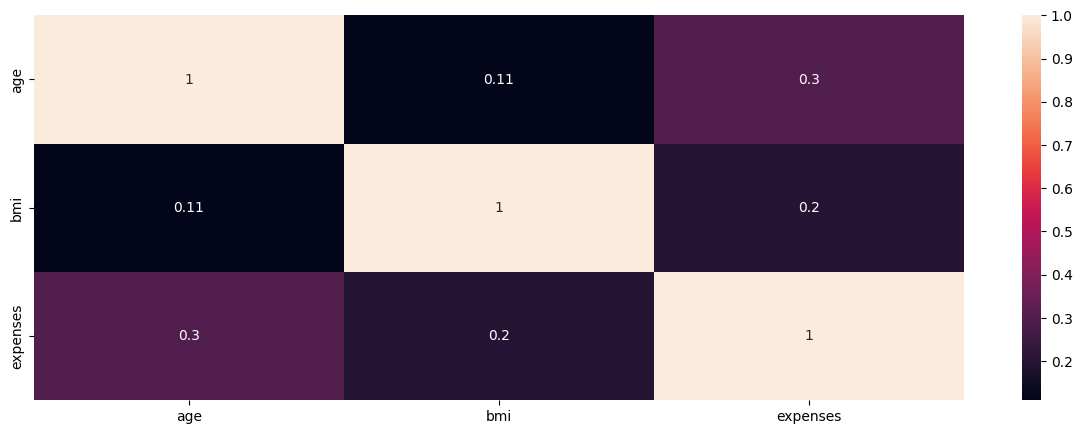

In [11]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto1.corr(),annot=True)
plt.show()

In [12]:
auto

,age,sex,region,smoker,bmi,expenses
0,19,female,southwest,yes,27.9,16884.92
1,18,male,southeast,no,33.8,1725.55
2,28,male,southeast,no,33.0,4449.46
3,33,male,northwest,no,22.7,21984.47
4,32,male,northwest,no,28.9,3866.86
...,...,...,...,...,...,...
1333,50,male,northwest,no,31.0,10600.55
1334,18,female,northeast,no,31.9,2205.98
1335,18,female,southeast,no,36.9,1629.83
1336,21,female,southwest,no,25.8,2007.95


In [13]:
from sklearn.preprocessing import StandardScaler

df_scaled = df[["age","bmi","expenses"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)

In [14]:
# k-means with some arbitrary k
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(df_scaled_fit)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=5)

In [15]:
kmeans.labels_

array([4, 1, 1, ..., 1, 4, 2], dtype=int32)

In [16]:
auto["label"] = kmeans.labels_

In [17]:
auto

,age,sex,region,smoker,bmi,expenses,label
0,19,female,southwest,yes,27.9,16884.92,4
1,18,male,southeast,no,33.8,1725.55,1
2,28,male,southeast,no,33.0,4449.46,1
3,33,male,northwest,no,22.7,21984.47,4
4,32,male,northwest,no,28.9,3866.86,4
...,...,...,...,...,...,...,...
1333,50,male,northwest,no,31.0,10600.55,2
1334,18,female,northeast,no,31.9,2205.98,1
1335,18,female,southeast,no,36.9,1629.83,1
1336,21,female,southwest,no,25.8,2007.95,4


In [18]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled_fit)

    ssd.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

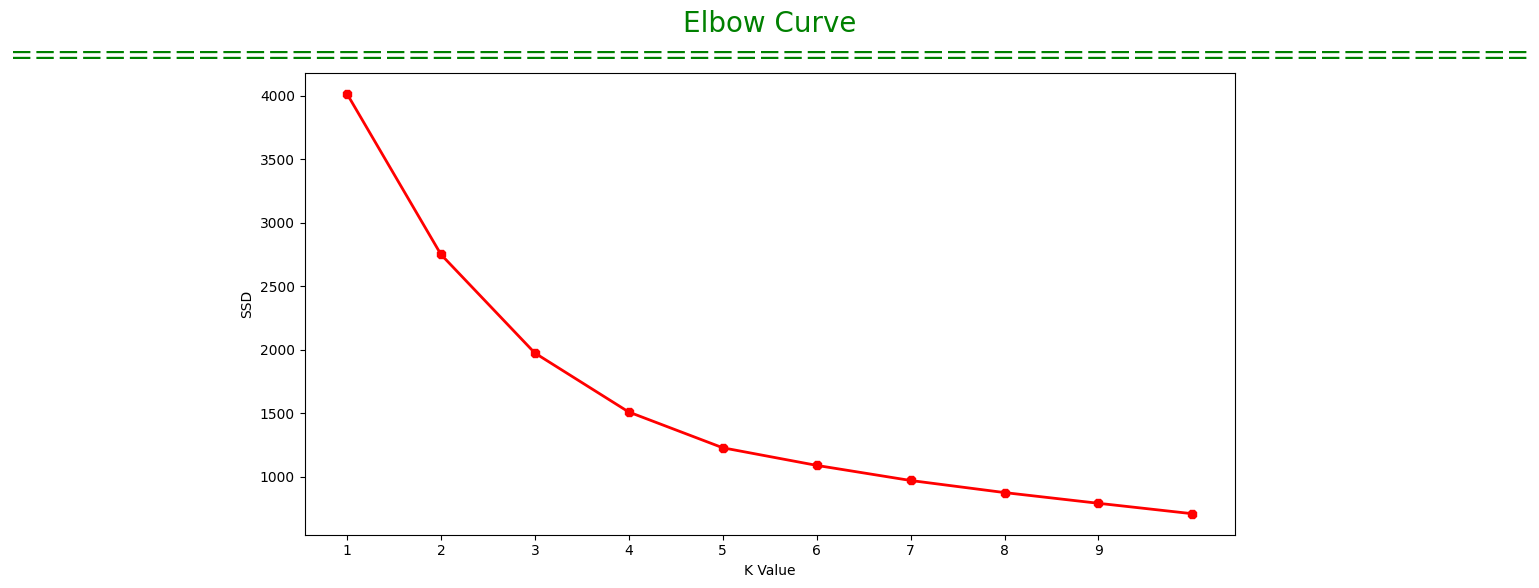

In [19]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("SSD")

plt.show()

In [20]:
auto["label"] = kmeans.labels_

In [21]:
import plotly.express as px
["age","bmi","expenses"]
fig = px.scatter_3d(auto, x='bmi', y='expenses',z='age',color='label')
fig.show()

In [22]:
#auto, x='bmi', y='expenses',z='age', color='label'
import plotly.express as px
fig = px.scatter_3d(auto, x='bmi', y='expenses',z='age', color='label', size_max=18,
              symbol='region', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

link of the plot
https://plotly.com/python/3d-scatter-plots/